In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import bayespy 

import pymc3 as pm
import arviz as az
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import ks_2samp

# pd.set_option('display.max_columns', None)

from utils import *

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

#%load_ext watermark
#%watermark -dtmvgp numpy,scipy,matplotlib,pandas,seaborn,pymc3,theano,arviz

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
# path = r'X:\CAO\Team\Client\BET\PerformanceLink\2021_05_Sistas S3\$Analysis\4. Model\Model Input\$ final model\BET_SISTAS_S3_MODEL_NBR_6_DT83121.csv'
path = r'x:\CAO\Team\Client\BET\PerformanceLink\2021_05_Sistas S3\$Analysis\4. Model\Model Input\$ final model\BET_SISTAS_S3_MODEL_NBR_6_DT83121.csv'
data = pd.read_csv(path).drop(columns=['TOTAL_IMPS', 'COUNT_BLU_ID'])
data = data[data.TOTAL_CONV<100]

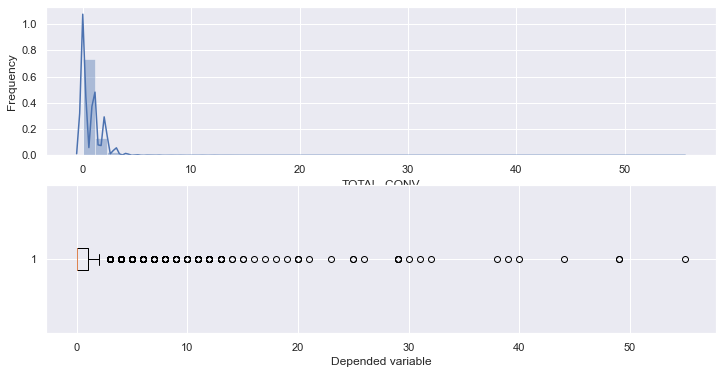

In [3]:
target_distribution(data.TOTAL_CONV)

In [4]:
data.columns

Index(['DIG_BUSTLE_NOTDEMO', 'DIG_BUSTLE_INDEMO', 'DIG_BUZZFEED_NOTDEMO',
       'DIG_BUZZFEED_INDEMO', 'DIG_VIZIO_NOTDEMO', 'DIG_VIZIO_INDEMO',
       'TV_LOC_RBLK_OFF_NOTDEMO_H', 'TV_LOC_RBLK_OFF_NOTDEMO_L',
       'TV_LOC_RBLK_OFF_NOTDEMO_M', 'TV_LOC_RBLK_OFF_NOTDEMO_N',
       'TV_LOC_RBLK_OFF_INDEMO_H', 'TV_LOC_RBLK_OFF_INDEMO_L',
       'TV_LOC_RBLK_OFF_INDEMO_M', 'TV_LOC_RBLK_OFF_INDEMO_N',
       'TV_LOC_ROS_OFF_NOTDEMO_H', 'TV_LOC_ROS_OFF_NOTDEMO_L',
       'TV_LOC_ROS_OFF_NOTDEMO_M', 'TV_LOC_ROS_OFF_NOTDEMO_N',
       'TV_LOC_ROS_OFF_INDEMO_H', 'TV_LOC_ROS_OFF_INDEMO_L',
       'TV_LOC_ROS_OFF_INDEMO_M', 'TV_LOC_ROS_OFF_INDEMO_N',
       'TV_NAT_FIXPOS_OFF_NOTDEMO_H', 'TV_NAT_FIXPOS_OFF_NOTDEMO_L',
       'TV_NAT_FIXPOS_OFF_NOTDEMO_M', 'TV_NAT_FIXPOS_OFF_NOTDEMO_N',
       'TV_NAT_FIXPOS_OFF_INDEMO_H', 'TV_NAT_FIXPOS_OFF_INDEMO_L',
       'TV_NAT_FIXPOS_OFF_INDEMO_M', 'TV_NAT_FIXPOS_OFF_INDEMO_N',
       'TV_NAT_ONAIR_CROSS_NOTDEMO_H', 'TV_NAT_ONAIR_CROSS_NOTDEMO_L',
       '

In [13]:
df_dig = data[['DIG_BUSTLE_NOTDEMO', 'DIG_BUSTLE_INDEMO', 'DIG_BUZZFEED_NOTDEMO',
               'DIG_BUZZFEED_INDEMO', 'DIG_VIZIO_NOTDEMO', 'DIG_VIZIO_INDEMO', 'TOTAL_CONV']]

df_dig.to_csv(r'x:\CAO\Team\Client\BET\PerformanceLink\2021_05_Sistas S3\$Analysis\4. Model\Model Input\$ final model\dig.csv', index = False)

In [14]:
tv_dig = data[['DIG_IMPS', 'TV_IMPS', 'TOTAL_CONV']]

tv_dig.to_csv(r'x:\CAO\Team\Client\BET\PerformanceLink\2021_05_Sistas S3\$Analysis\4. Model\Model Input\$ final model\tv_dig.csv', index = False)

In [48]:
!Python -V

Python 3.8.12


In [ ]:
az.convert_to_inference_data